# Практична робота №8

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

### Завдання для Практичної Роботи з Теми "Computer Vision"

#### Мета:
Розробка та тренування конволюційної нейронної мережі (CNN) за допомогою TensorFlow для бінарної класифікації зображень їжі.

#### Дані:
Набір даних: [10_food_classes_all_data.zip](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip), що містить зображення десяти різних класів їжі.

#### Завдання:
1. **Вибір Класів для Класифікації:**
   - Використовуйте останню цифру свого номера у списку групи для вибору першого класу (наприклад, 1 для першого класу, 2 для другого, і так далі, з циклічним поверненням до 1 після 10).
   - Другий клас вибирається на основі суми цифр вашого номера у списку. Наприклад, якщо ваш номер - 12, сума цифр буде 1 + 2 = 3, тому другий клас буде 3-м у списку. Якщо сума перевищує 10, продовжуйте віднімати 10, доки не отримаєте число від 1 до 10.

2. **Попередня Обробка Даних:**
   - Завантажте та розпакуйте набір даних.
   - Поділіть дані на тренувальний та тестовий набори.
   - Виконайте необхідну попередню обробку даних (нормалізація, ресайзинг тощо).

3. **Розробка Моделі CNN:**
   - Створіть модель CNN за допомогою TensorFlow.
   - Ви можете експериментувати з різними архітектурами та гіперпараметрами.

4. **Тренування та Оцінка Моделі:**
   - Тренуйте модель на тренувальному наборі даних.
   - Оцініть ефективність моделі на тестовому наборі.
   - Запишіть результати точності та інші метрики ефективності.

5. **Аналіз Результатів:**
   - Проаналізуйте отримані результати.
   - Оцініть, наскільки ефективно модель розрізняє між обраними класами.
   - Обговоріть можливі шляхи покращення моделі.


### 1st class: 9, 2nd class: 8

### Necessary imports

In [7]:
import os
import zipfile
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D

### Dataset unpacking and displaying

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

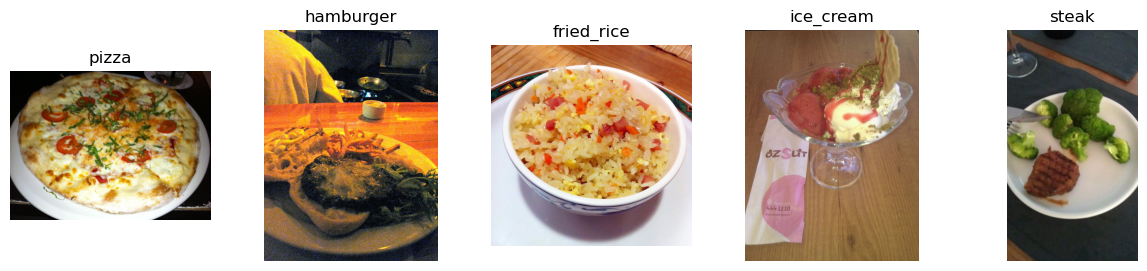

In [8]:
tf.random.set_seed(42)

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

main_dir="10_food_classes_all_data"

for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def view_random_images(target_dir, num_images):
    # Get random classes
    random_classes = random.sample(os.listdir(target_dir), num_images)

    # Plot images in a single row without axes
    plt.figure(figsize=(15, 3))
    for i, target_class in enumerate(random_classes, 1):
        target_folder = os.path.join(target_dir, target_class)
        # One random image from each class
        random_image = random.choice(os.listdir(target_folder))
        img_path = os.path.join(target_folder, random_image)
        img = mpimg.imread(img_path)
        
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(target_class)
        plt.axis("off")

        print(f"Image {i} shape: {img.shape}")  # show the shape of each image

    plt.show()

# View 5 random images from random classes
view_random_images(target_dir="10_food_classes_all_data/train/", num_images=5)


### Data processing and model creation

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 118s 2s/step - loss: 0.6174 - accuracy: 0.6693 - val_loss: 0.4586 - val_accuracy: 0.7880
Epoch 2/10
47/47 [==============================] - 170s 4s/step - loss: 0.5534 - accuracy: 0.7193 - val_loss: 0.5623 - val_accuracy: 0.7000
Epoch 3/10
47/47 [==============================] - 165s 3s/step - loss: 0.5432 - accuracy: 0.7293 - val_loss: 0.4290 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 186s 4s/step - loss: 0.4982 - accuracy: 0.7580 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 5/10
47/47 [==============================] - 182s 4s/step - loss: 0.4803 - accuracy: 0.7760 - val_loss: 0.3822 - val_accuracy: 0.8360
Epoch 6/10
47/47 [==============================] - 124s 3s/step - loss: 0.4633 - accuracy: 0.7880 - val_loss: 0.4750 - val_accuracy: 0.7640
Epoch 7/10
47/47 [==============================] - 104s 2s/step - loss

<Axes: >

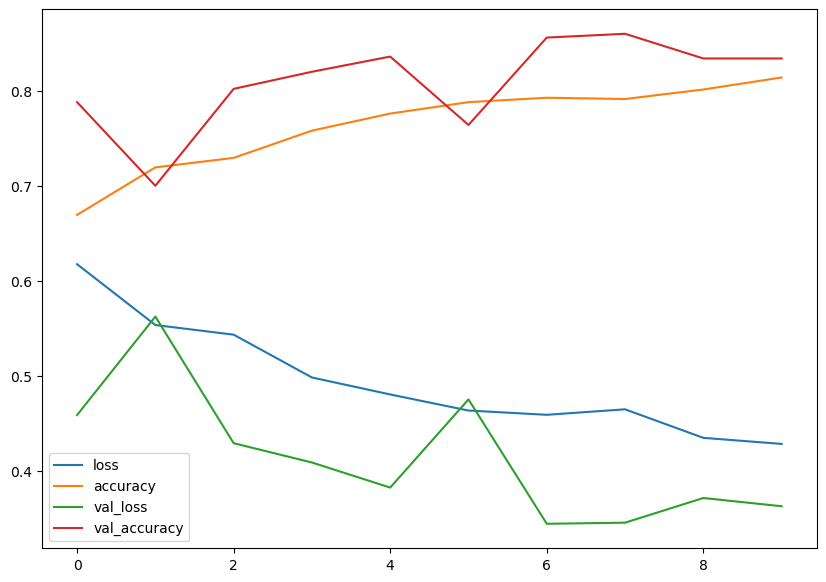

In [9]:
# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

classes = ['steak', 'ramen']

# Preprocess data (normalization)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

batch_size = 32

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                   batch_size=batch_size,
                                                   target_size=(224, 224),
                                                   class_mode='binary',
                                                   classes=classes,
                                                   shuffle=True,
                                                   seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                 batch_size=batch_size,
                                                 target_size=(224, 224),
                                                 class_mode='binary',
                                                 classes=classes,
                                                 shuffle=False,
                                                 seed=42)

# Creating CNN model
model = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, # can also be (3, 3)
         activation="relu", 
         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

model.summary()

#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, steps=len(test_data))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training curves
pd.DataFrame(history.history).plot(figsize=(10, 7))